In [9]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [70]:
img = plt.imread("img.jpg")
HEIGHT = img.shape[0]
WIDTH = img.shape[1]

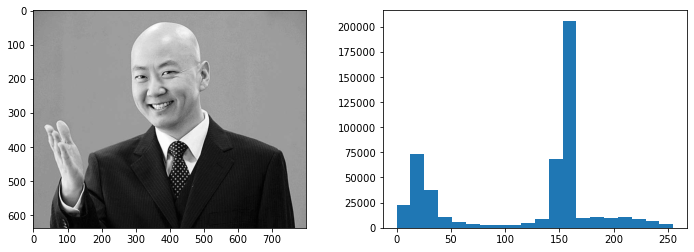

In [71]:
# 灰度
gravity= np.array([0.299,0.587,0.114])
img_gray = np.dot(img,gravity)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.imshow(img_gray,cmap='gray')
plt.subplot(1,2,2)
num,boundary,_ = plt.hist(img_gray.flatten(),bins=20)

In [46]:
median=np.median(img_gray.flatten())

In [51]:
background

236.66666666666666

In [52]:
median

158.92399999999998

In [73]:
# 二值化
background = img[HEIGHT//10][WIDTH//10].mean()
img_bin = img_gray.copy()
index = np.where(num==np.max(num))[0]
if background<= median: # 背景是暗色
    bounder = boundary[index+1][0]
    img_bin[img_gray<=bounder]=0
    img_bin[img_gray>bounder]=1
else: # 背景是亮色
    bounder = boundary[index][0]
    img_bin[img_gray>bounder]=1
    img_bin[img_gray<=bounder]=0
    
#形态学
kernel = np.ones((10,10),np.uint8)
img_open = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernel)
img_close = cv2.morphologyEx(img_bin, cv2.MORPH_CLOSE, kernel)

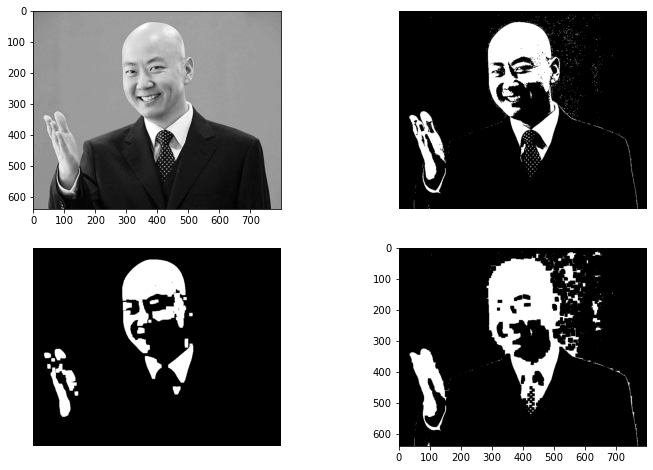

In [74]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.imshow(img_gray,cmap='gray')
plt.subplot(2,2,2)
plt.axis('off')
plt.imshow(img_bin,cmap='gray')

plt.subplot(2,2,3)
plt.axis('off')
plt.imshow(img_open,cmap='gray')
plt.subplot(2,2,4)
plt.imshow(img_close,cmap='gray')

In [57]:
def find_biggest_area(img_data):
    # 确定最大区域
    boundary_list = []
    boundary_len = []
    last_value = 0
    for i,item in enumerate(img_data):
        if item!=last_value:
            last_value=item
            boundary_list.append(i)
            if len(boundary_list)%2==0:
                boundary_len.append(boundary_list[-1]-boundary_list[-2])
    max_area_id = boundary_len.index(max(boundary_len))
    left_boundary = boundary_list[2*max_area_id]
    right_boundary = boundary_list[2*max_area_id+1]
    return left_boundary,right_boundary

In [25]:
# img_open=img_bin

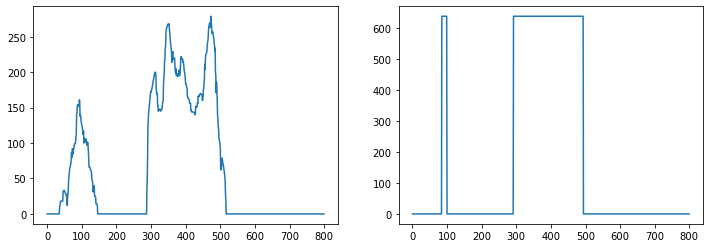

In [26]:
plt.figure(figsize=(12,4))
img_row=img_open.sum(axis=0)
plt.subplot(1,2,1)
plt.plot(img_row)
plt.subplot(1,2,2)
img_row[img_row>HEIGHT//5]=HEIGHT
img_row[img_row<=HEIGHT//5]=0
plt.plot(img_row)


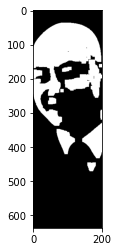

In [27]:
left_boundary,right_boundary = find_biggest_area(img_row)
plt.imshow(img_open[:,left_boundary:right_boundary],cmap='gray')

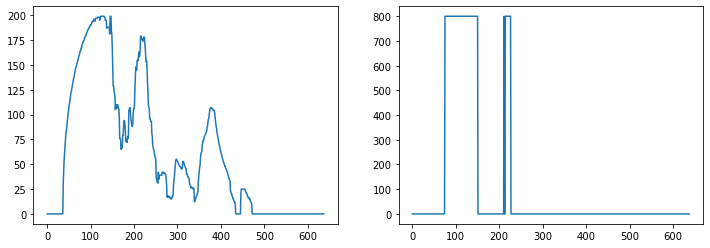

In [28]:
plt.figure(figsize=(12,4))
img_column=img_open[:,left_boundary:right_boundary].sum(axis=1)
plt.subplot(1,2,1)
plt.plot(img_column)
plt.subplot(1,2,2)
img_column[img_column>WIDTH//5]=WIDTH
img_column[img_column<=WIDTH//5]=0
plt.plot(img_column)

In [29]:
up_boundary,bottom_boundary = find_biggest_area(img_column)

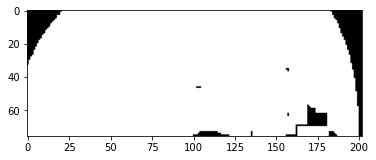

In [30]:
plt.imshow(img_open[up_boundary:bottom_boundary,left_boundary:right_boundary],cmap='gray')

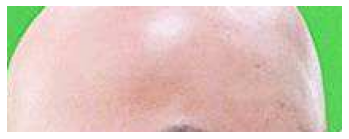

In [163]:
plt.axis('off')
plt.imshow(img[up_boundary:bottom_boundary,left_boundary:right_boundary])

In [149]:
h = cv2.findContours(img_open.astype('uint8'),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
contours = h[0]

In [153]:
temp = np.ones(img_gray.shape,np.uint8)*255
temp = cv2.drawContours(temp,contours,-1,(0,255,0),3)

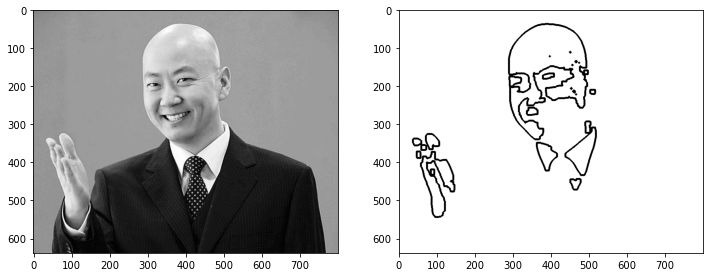

In [155]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(img_gray,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(temp,cmap='gray')

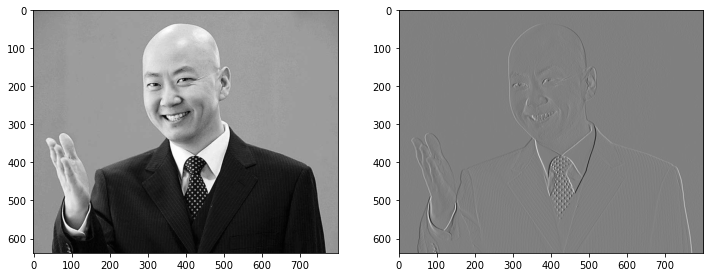

In [31]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(img_gray,cmap='gray')
plt.subplot(1,2,2)
img_sobel_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)  
plt.imshow(img_sobel_x,cmap='gray')

In [42]:
MASK_SIZE = 40
rows, cols = img_open.shape
cx, cy = int(rows/2), int(cols/2)
mask = np.zeros((rows, cols, 2), np.uint8)
mask[cx-MASK_SIZE: cx+MASK_SIZE, cy-MASK_SIZE: cy+MASK_SIZE] = 1


dft = cv2.dft(img_open, flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

mask_shift = dft_shift * mask

magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
mask_spectrum = 20 * np.log(cv2.magnitude(mask_shift[:, :, 0], mask_shift[:, :, 1]))

# 5.逆傅里叶变换
inverse_shift = np.fft.ifftshift(mask_shift)
img_inverse = cv2.idft(inverse_shift)
img_inverse = cv2.magnitude(img_inverse[:, :, 0], img_inverse[:, :, 1])

D:\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


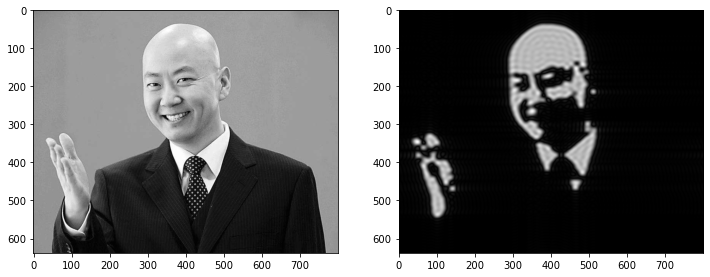

In [43]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(img_gray,cmap='gray')
plt.subplot(1,2,2)
img_sobel_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)  
plt.imshow(img_inverse,cmap='gray')